<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/1_gradient_descent_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([11.2, 18.9, 10.2, 2.4, 11.6, 8.1, 19.8, 3.0, 11.2, 13.1, 8.4, 9.7, 12.6, 10.9, 11.3, 16.1, 14.0, 15.9, 6.2, 1.1, 9.7, 16.7, 4.7, 13.9, 19.7, 3.0, 17.0, 6.7, 3.1, 9.8, 5.8, 6.8, 17.9, 19.7, 2.4, 19.9, 19.9, 18.4, 19.9, 6.0, 11.7, 6.4, 7.3, 14.0, 6.0, 14.4, 3.0, 8.2, 17.6, 2.7, 14.1, 9.8, 6.9, 2.3, 1.8, 9.9, 6.2, 13.9, 9.3, 10.1, 12.0, 19.7, 18.1, 1.7, 18.4, 4.4, 9.0, 17.3, 5.9, 11.3, 14.1, 1.1, 14.3, 6.3, 11.5, 1.3, 6.3, 15.5, 5.3, 17.1, 19.9, 2.3, 10.4, 5.7, 2.4, 19.9, 4.9, 9.1, 12.0, 6.2, 3.3, 16.3, 19.7, 13.3, 5.0, 16.6, 2.4, 5.4, 7.4, 9.8])
y_train = np.array([143.6424558942608, 226.75496919186713, 139.88664660217523, 59.09995594489472, 131.85668219790853, 88.5304521003008, 187.83693420905036, 71.9929395156964, 128.4453575745869, 142.792333826274, 127.59432689401402, 99.03584121088643, 162.69590838460857, 134.9312276865794, 112.24340246969035, 179.4839250994363, 179.45927067511576, 194.91190927791882, 111.90868505766947, 37.7636250398664, 184.44592507253344, 168.59218389865248, 59.02723219969597, 157.78271825050507, 188.62499082817195, 70.84983234678842, 208.07064981251685, 87.380006621243, 40.3116709265299, 88.09892258371329, 62.214833426041594, 102.87422567542454, 194.75677156576748, 208.46262411920554, 54.0289666304961, 242.16373305864056, 224.1423374011256, 210.29025791726343, 246.43724267099554, 83.51106587909665, 130.81422907110846, 97.4625100554795, 87.86739634614891, 152.64348551734477, 105.47467240279111, 158.1609465834876, -3.1035209512694024, 108.91035887777532, 188.08967096839413, 41.21726287060116, 170.05872653067019, 114.6787818329787, 93.2987766018951, 2.5537013360852967, 19.138863830654753, 147.07917477318585, 81.6289839097672, 125.52990756019554, 91.54936331128684, 101.1482764119362, 142.04695365099334, 208.34781438903974, 187.81635395127043, 37.07874608862806, 213.55508198867054, 58.81942710522219, 98.50581584773201, 184.57003559320233, 85.79641928373287, 132.85239700110853, 176.3459367741281, 8.00414845011283, 147.49327788086111, 98.46281711778498, 118.96344313300612, 60.68031437865356, 111.10410611756376, 202.84651506983806, 55.38718362940462, 192.53789897169142, 209.13135035593348, 61.463252166839055, 158.13209907356924, 94.47178831270759, 44.18288691480275, 211.68921406334914, 81.98173465258212, 86.54252926649386, 150.72672064764132, 63.70618137477445, 65.41096431923471, 179.78125246273873, 209.23471202046773, 135.28975252342303, 62.86509948463612, 197.1224359706793, 64.87721221837316, 84.52896322669392, 121.2777304883421, 168.78325432538665])

In [3]:
def tabulate_data(x, y):
  fig, ax = plt.subplots()
  table_data = np.column_stack((x, y))
  table = ax.table(cellText=table_data, colLabels=['House Area (x)', 'Price (y)'], loc='center')
  ax.axis('off')

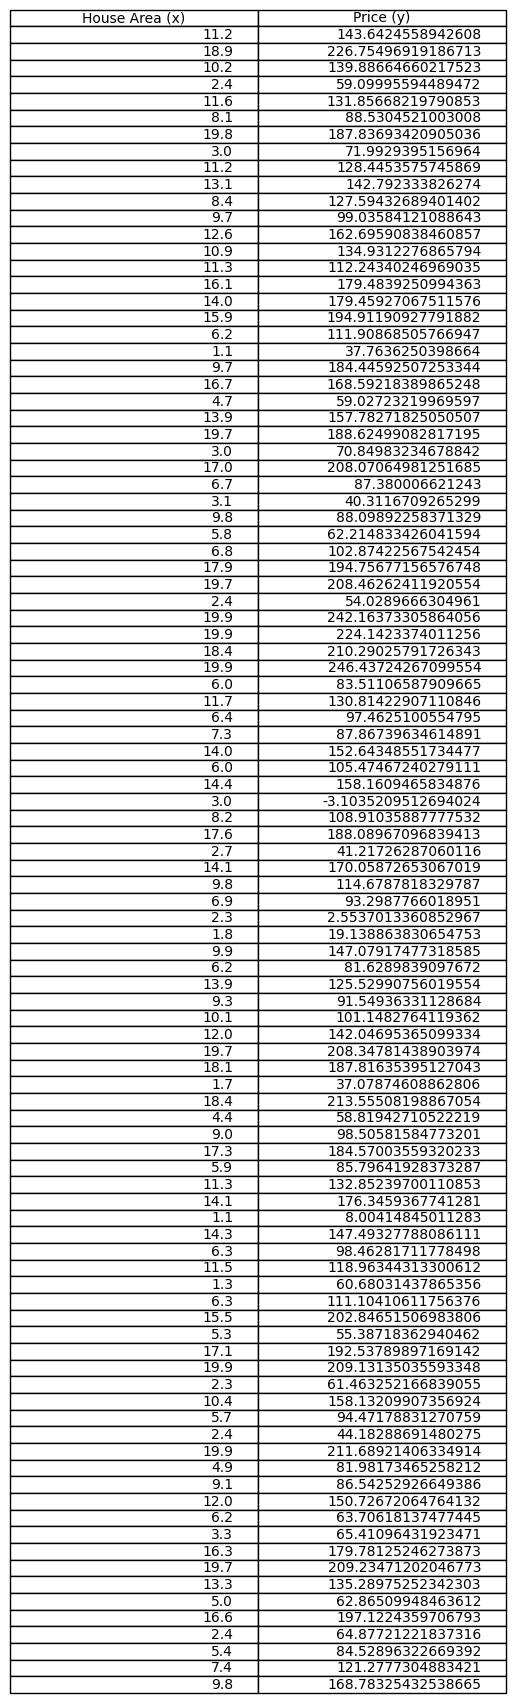

In [4]:
tabulate_data(X_train, y_train)

In [5]:
def scatter_plot(x, y, c = "r", marker = "x", label="Data point"):
  plt.scatter(x, y, c=c, marker=marker, label=label)
  plt.xlabel("Area in 100sq. ft")
  plt.ylabel("Price in 1000$")

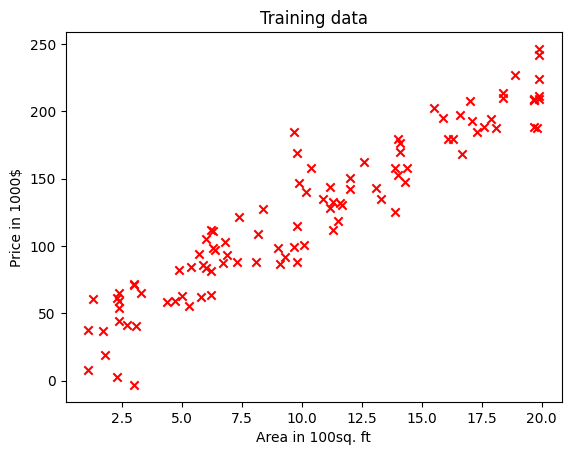

In [6]:
scatter_plot(X_train, y_train, label="Original Data")
plt.title("Training data")
plt.show()

In [7]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  f_wb = w * x + b
  cost = np.sum((f_wb - y) ** 2) / (2 * m)
  return cost

In [8]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  f_wb = w * x + b
  dj_dw = np.sum((f_wb - y) * x) / m
  dj_db = np.sum(f_wb - y) / m
  return dj_dw, dj_db

In [9]:
def gradient_descent(x, y, w_init, b_init, alpha, iteration_count, cost_function, gradient_function):

  w = w_init
  b = b_init

  for i in range(iteration_count):
    dj_dw, dj_db = gradient_function(x, y, w, b)

    w -= alpha * dj_dw
    b -= alpha * dj_db

  return w, b

In [10]:
w_init = 0
b_init = 0
tmp_alpha = 1.0e-2
iterations = 1000

w_final, b_final = gradient_descent(X_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

In [11]:
print(f"w = {w_final}, b = {b_final}")
print(f"Model: f(x) = {w_final}x + {b_final}")

w = 9.93458988431439, b = 21.961332294771136
Model: f(x) = 9.93458988431439x + 21.961332294771136


In [12]:
def get_model(w, b):
  return lambda x: w * x + b

In [13]:
model = get_model(w_final, b_final)

In [14]:
def plt_regression_line():
  x = np.linspace(0, 20, 100)
  y = model(x)
  plt.plot(x, y, label="Linear Model")

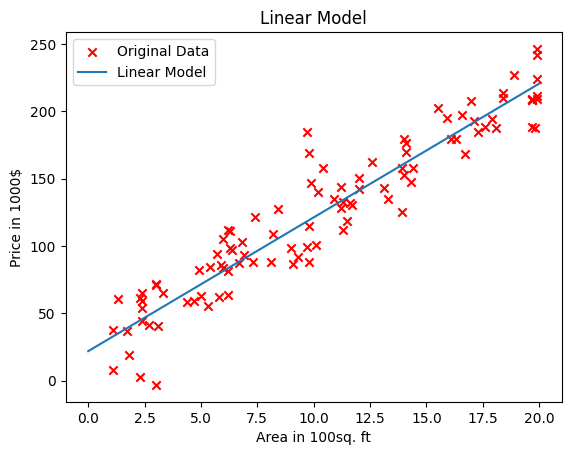

In [15]:
scatter_plot(X_train, y_train, label="Original Data")
plt_regression_line()
plt.title("Linear Model")
plt.legend()
plt.show()

In [16]:
X_pred = np.array([3.0, 4.2, 8.8, 12.5, 16.4, 19.7])
y_pred = model(X_pred)

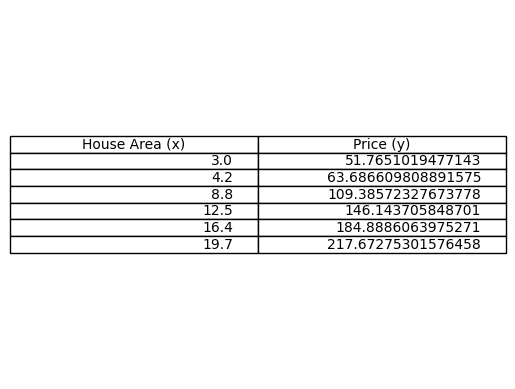

In [17]:
tabulate_data(X_pred, y_pred)

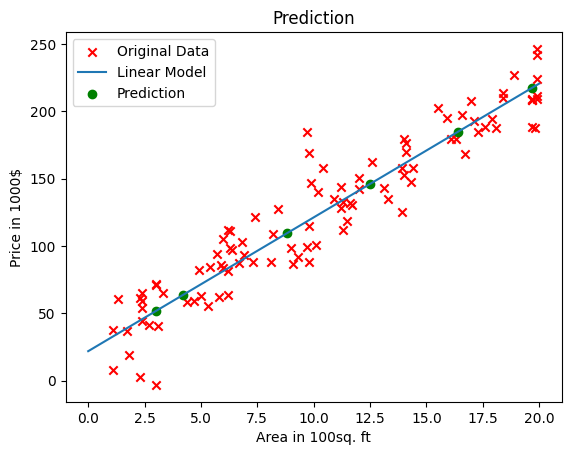

In [18]:
scatter_plot(X_train, y_train, label="Original Data")
plt_regression_line()
scatter_plot(X_pred, y_pred, c="g", marker="o", label="Prediction")
plt.legend()
plt.title("Prediction")
plt.show()